# Preprocessing of Discrete Classification Data
# Reading and Understanding Data
## Importing Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
from sklearn.preprocessing import LabelEncoder, StandardScaler
import warnings
warnings.filterwarnings("ignore")
import math

## Loading Dataset

We have used the [Balance Scale Dataset](https://archive.ics.uci.edu/ml/datasets/Balance+Scale) from UCI ML Repository.

We will load the dataset using Pandas read_csv() function and display its first 5 data points

In [2]:
df = pd.read_csv('balance-scale.csv')

print('Number of instances: %d' % (df.shape[0]))
print('Number of attributes: %d' % (df.shape[1]))

df.head(5)

Number of instances: 625
Number of attributes: 5


,Class,L-Weight,L-Distance,R-Weight,R-Distance
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5


## Data Type

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625 entries, 0 to 624
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Class       625 non-null    object
 1   L-Weight    625 non-null    int64 
 2   L-Distance  625 non-null    int64 
 3   R-Weight    625 non-null    int64 
 4   R-Distance  625 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 24.5+ KB


The Dataset has 625 instances with 4 attributes and 3 classes as follows:



*   L-Weight : 1,2,3,4,5<br>
*   L-Distance : 1,2,3,4,5<br>
*   R-Weight : 1,2,3,4,5<br>
*   R-Distance : 1,2,3,4,5<br>

Class --> L(left tilted), R(right tilted), B(balanced)

Weight --> 1(very light), 2(light), 3(medium), 4(heavy), 5(very heavy) so L-weight and R-weight are ordinal attributes as it represent some order because light can't come after heavy<br>

Distance --> 1(very far), 3(far), 3(middle), 2(near), 5(very near) so L-Distance and R-Distance are ordinal attributes as it represent some order because very near can't come after far<br>



## Summary Statistics

In [4]:
category_weight = pd.api.types.CategoricalDtype(categories=[5,4,3,2,1], ordered=True)
for col in ["L-Weight","R-Weight"]:
    df[col] = df[col].astype(category_weight)
category_distance = pd.api.types.CategoricalDtype(categories=[1,2,3,4,5], ordered=True)
for col in ["L-Distance","R-Distance"]:
    df[col] = df[col].astype(category_distance)
dataset=df
print(df.describe(include=['category']))
for col in df.columns:
  if col!='Class':
    df[col]=df[col].astype(int)

        L-Weight  L-Distance  R-Weight  R-Distance
count        625         625       625         625
unique         5           5         5           5
top            1           5         1           5
freq         125         125       125         125


Here in the above output top shows the most common value from each attribute, result will be arbitrarily chosen from among those with the highest count. The freq is the most common value’s frequency. unique is the number of unique entries.

# Data Quality Issues

## Missing Values
We will count the number of missing values in each column of the data.

In [ ]:
df.isnull().any()

Class         False
L-Weight      False
L-Distance    False
R-Weight      False
R-Distance    False
dtype: bool

We see that there are no missing or null value in any of the attributes.

## Duplicate data
We first check for duplicate instances in the dataset. The **duplicated()** function will return a Boolean array that indicates whether each row is a duplicate of a previous row in the table. 

In [ ]:
df.duplicated().sum()

0

Since there are no duplicate values, we dont have to remove any record.
## Outliers
We will draw a boxplot to identify the columns in the table that contain outliers.


Text(0.5, 0, 'Attributes')

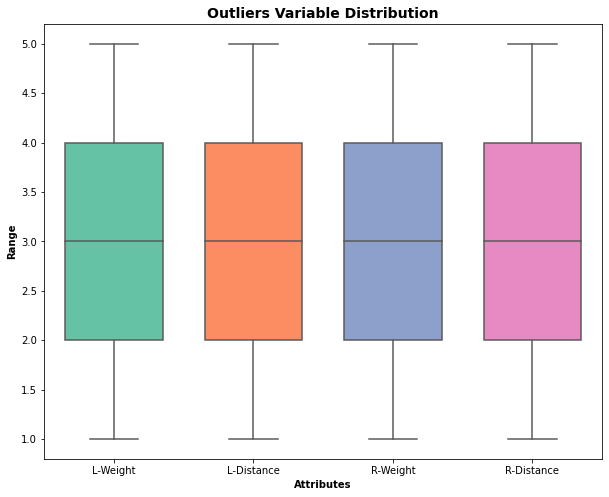

In [ ]:
attributes = df.columns
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = df[attributes], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')

The boxplots suggest that none of the attributes contain abnormally high  or low values. So, we wont be removing records for any of these attributes.


## Class Imbalance Sampling
We will analysis by class counts to check how the class values are distributed over the dataset.

L    288
R    288
B     49
Name: Class, dtype: int64


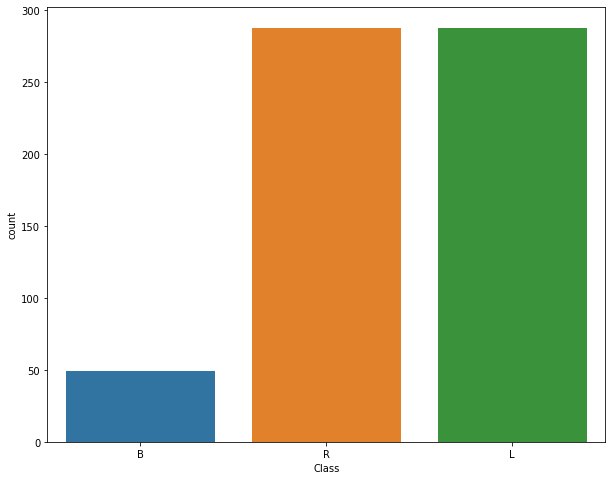

In [ ]:
print(df.Class.value_counts())
sns.countplot(df['Class'],label="Count")
plt.show()

Since count of B Class is significantly less compared to R and L classs, we will oversample the B class count of match the max class count.

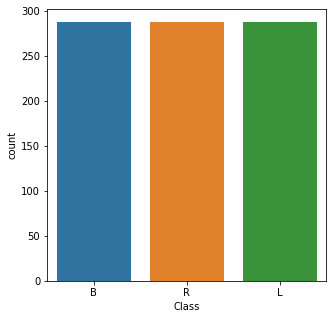

In [ ]:
class_count = df.Class.value_counts()
majority_target = max(class_count)

df_class_B = df[df['Class'] == "B"]
df_class_L = df[df['Class'] == "L"]
df_class_R = df[df['Class'] == "R"]
df_class_B_over = df_class_B.sample(majority_target,replace = True)

df = pd.concat([df_class_B_over,df_class_R,df_class_L], axis = 0)

plt.figure(figsize=(5,5))
sns.countplot(df['Class'],label="Count")
plt.show()

# Dimension Reduction
Since our data is ordinal, we used **Spearman’s Rank correlation** for calculating the correlation matrix (correlation between attributes and class), the heatmap of which is given below.

Data which doesn't follow gaussian Distribution or is ordinal data we can't use pearson correlation in them instead we have to use some rank correlation technique which use ordinal relationship to quantify association between attributes 

Spearman’s correlation calculates using pearson correlation but taking values as rank values not real values.

In [ ]:
def correl(inp1,inp2):
  coef, p = ss.spearmanr(inp1, inp2)
  return coef

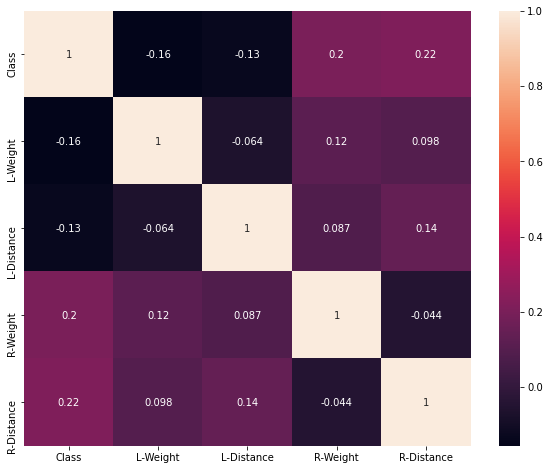

In [ ]:

df['Class'] = LabelEncoder().fit_transform(df['Class'].tolist())
correlation = np.zeros((5,5))
for x,i in zip(df.columns,range(5)):
    for y,j in zip(df.columns,range(5)):
        correlation[i, j] = correl(df[x],df[y])
sns.heatmap(correlation,xticklabels=df.columns, yticklabels=df.columns,annot=True)
plt.show()

From the heatmap we can see that there is no attribute which is highly correlated with other attributes, all the attributes are weakly correlated with the class and so we dont need to drop any attribute except class to separate target from attribute.

# Graph Plots

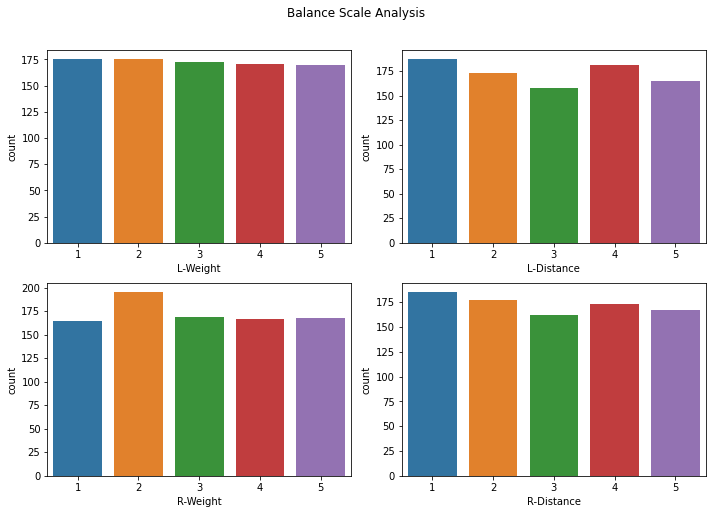

In [ ]:
y=df.Class
X=df.drop("Class",axis=1)
plt.figure(figsize = (10, 20))
j = 0
for i in X.columns:
  plt.subplot(6, 2, j+1)
  sns.countplot(X[i])
  j += 1
plt.suptitle('Balance Scale Analysis')
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

Since the attribute values are discrete in nature, normality check of the attribute will not yield any useful result.

# Classification
We will first import the require modules for classification and calculation.

In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import  accuracy_score
from math import sqrt
from statistics import mean

We will use 5x5 fold validation technique for cross validation and stratified sampling for all the classifications.

In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=100) 

the following function splits data into train and test using n fold as given by user and then train model and calculate train and test accuract for each fold

In [ ]:
def crossFolding(test_acc,test_count,train_acc,train_count,model,X,y):
  for train_index, test_index in skf.split(X, y): 
    x_train_fold, x_test_fold = X.iloc[train_index], X.iloc[test_index] 
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index] 
    model.fit(x_train_fold, y_train_fold)
    test_count.append(len(test_index))
    train_count.append(len(train_index))
    test_acc.append(model.score(x_test_fold, y_test_fold))
    train_acc.append(model.score(x_train_fold, y_train_fold))
  return test_acc,test_count,train_acc,train_count

Function to perform evaluation of the classifier on the based of Accuracy, True Error with 80% and 90% confidence and also pessimistic error

In [ ]:
def evaluate(testAcc, Testlen, trainAcc, trainLen, Class, param,classifier):
  print('Overall Accuracy: %0.2f'%(testAcc))
  error=1-testAcc
  interval = sqrt( (error * (1 - error)) / Testlen)
  print('True Error with 90 percent confidence is: %0.2f to %0.2f' %(error-1.64*interval,error+1.64*interval))
  print('True Error with 80 percent confidence is: %0.2f to %0.2f' %(error-1.28*interval,error+1.28*interval))
  trainerror=1-trainAcc
  if classifier=='DT':
    pessi_error=trainerror+((1/Class)*param)/trainLen
    print('Pessimistic Error is: %0.2f' %(pessi_error))
  elif classifier=="5NN":
    pessi_error=trainerror+((1/Class)*param)/trainLen
    print('Pessimistic Error is: %0.2f' %(pessi_error))
  elif classifier=="NB":
    pessi_error=trainerror+((1/Class)*param)/trainLen
    print('Pessimistic Error is: %0.2f' %(pessi_error))    
  elif classifier=="RIP":
    pessi_error=trainerror+((1/Class)*param)/trainLen
    print('Pessimistic Error is: %0.2f' %(pessi_error))  

## Desision Tree
In this section, we apply ID3- a decision tree classifier to the dataset obtained after preprocessing.
### Importing Modules


In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

category_weight = pd.api.types.CategoricalDtype(categories=[5,4,3,2,1], ordered=True)
for col in ["L-Weight","R-Weight"]:
    X[col] = X[col].astype(category_weight)
category_distance = pd.api.types.CategoricalDtype(categories=[1,2,3,4,5], ordered=True)
for col in ["L-Distance","R-Distance"]:
    X[col] = X[col].astype(category_distance)

### Identifying the Max depth required


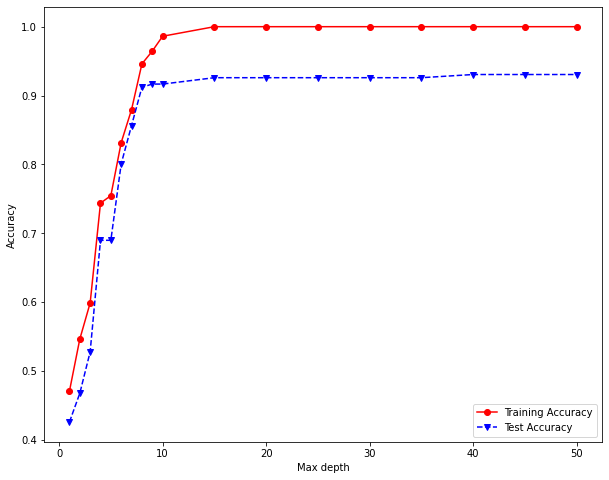

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=1)

maxdepths = [1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]

trainAcc = np.zeros(len(maxdepths))
testAcc = np.zeros(len(maxdepths))

index = 0
for depth in maxdepths:
    clf = DecisionTreeClassifier(max_depth=depth)
    clf = clf.fit(X_train, y_train)
    y_predTrain = clf.predict(X_train)
    y_predTest = clf.predict(X_test)
    trainAcc[index] = accuracy_score(y_train, y_predTrain)
    testAcc[index] = accuracy_score(y_test, y_predTest)
    index += 1

# Plot of training and test accuracies    
plt.plot(maxdepths,trainAcc,'ro-',maxdepths,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy')
plt.show()

### Performing classification on 5 folds with 4 training and 1 test fold

In [ ]:
dt = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth=9, min_samples_leaf=5)

DT_acc = []
length=[]
DT_trainACC=[]
trainEX=[]

DT_acc,length,DT_trainACC,trainEX =crossFolding(DT_acc,length,DT_trainACC,trainEX,dt,X,y)

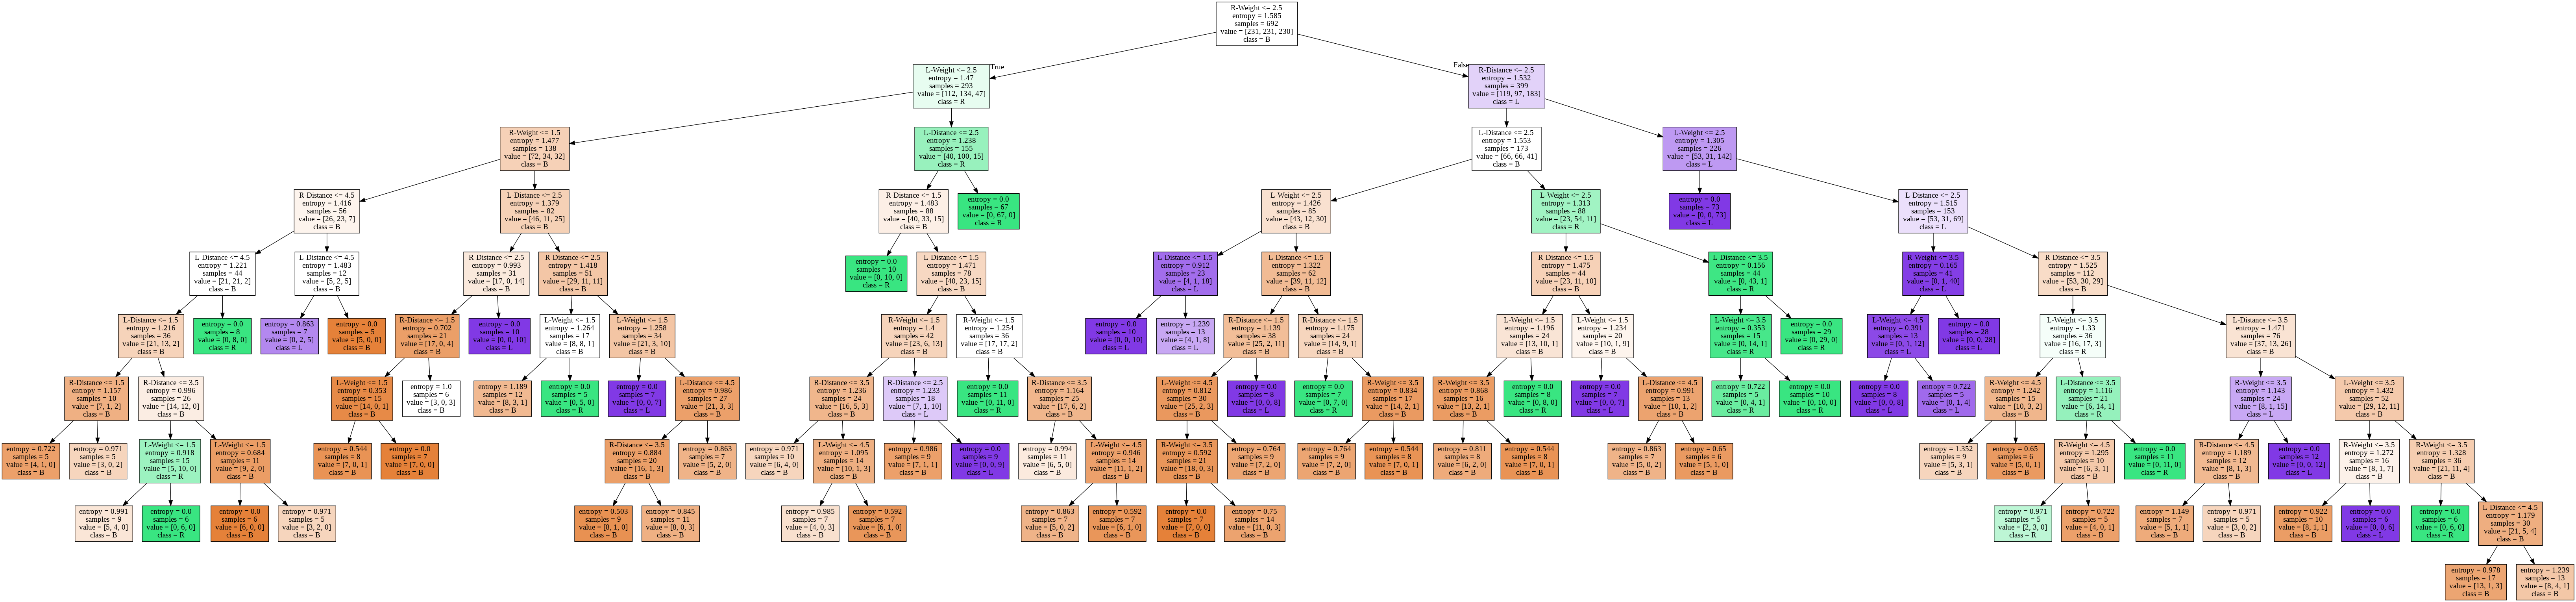

In [ ]:
import pydotplus
from IPython.display import Image

dot_data = export_graphviz(dt, feature_names=X.columns, class_names=['B','R','L'], filled=True, out_file=None) 
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

plotting accuracy for each fold

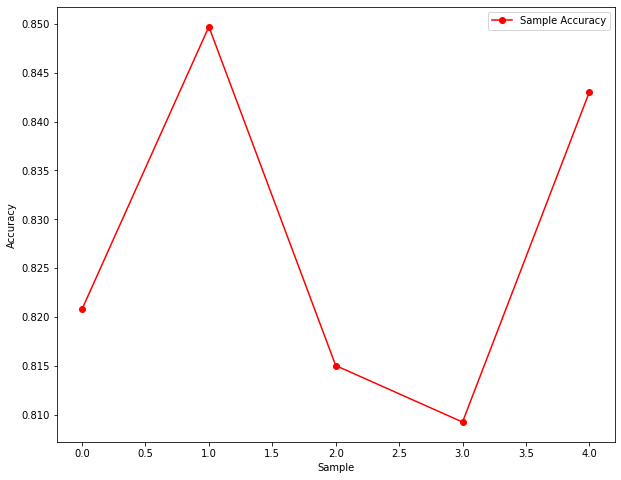

In [ ]:
plt.plot(range(0,5),DT_acc,'ro-')
plt.legend(['Sample Accuracy'])
plt.xlabel('Sample')
plt.ylabel('Accuracy')
plt.show()

### Evaluation
We can see that the generated tree has 57 leaf nodes. Thus, we use the number of leaf nodes as a measure of our model complexity while finding the pessimistic error.

In [ ]:
evaluate(mean(DT_acc),mean(length),mean(DT_trainACC),int(mean(trainEX)),3,57,"DT")

Overall Accuracy: 0.83
True Error with 90 percent confidence is: 0.13 to 0.22
True Error with 80 percent confidence is: 0.14 to 0.21
Pessimistic Error is: 0.16


## KNN
In this section, we apply 5NN a KNN classifier to the dataset obtained after preprocessing.
### Importing Modules


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

### Identifying the p value
We will split the data as 75% train and 25% test for this purpose.

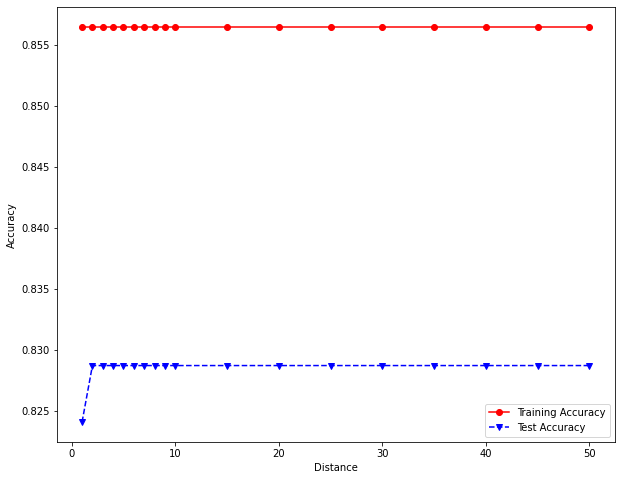

Here, max test accuracy value is 0.8287037037037037 for distance 2


In [ ]:
# Model fitting and evaluation
distances = [1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]

# Training and Test set creation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

trainAcc = []
testAcc = []

for distance in distances:
    knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=distance)
    knn.fit(X_train, y_train.values.ravel())
    y_predTrain = knn.predict(X_train)
    y_predTest = knn.predict(X_test)
    trainAcc.append(accuracy_score(y_train, y_predTrain))
    testAcc.append(accuracy_score(y_test, y_predTest))

best_distance=distances[testAcc.index(max(testAcc))]

# Plot of training and test accuracies    
plt.plot(distances,trainAcc,'ro-',distances,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Distance')
plt.ylabel('Accuracy')
plt.show()

print('Here, max test accuracy value is',max(testAcc),'for distance',best_distance)

### Performing classification on 5 folds with 4 training and 1 test fold

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=best_distance)

KNN_acc = []
length=[]
KNN_trainACC=[]
trainEX=[]

KNN_acc,length,KNN_trainACC,trainEX= crossFolding(KNN_acc,length,KNN_trainACC,trainEX,knn,X,y)

plotting accuracy for each fold

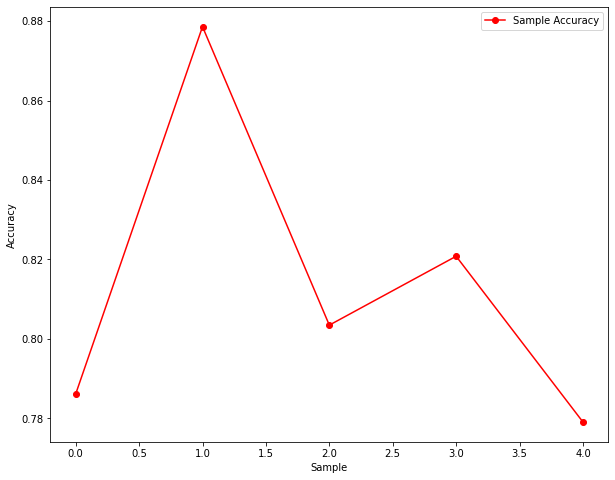

In [ ]:
plt.plot(range(0,5),KNN_acc,'ro-')
plt.legend(['Sample Accuracy'])
plt.xlabel('Sample')
plt.ylabel('Accuracy')
plt.show()

### Evaluation
Since we are taking k=5 as the number of neighbours to make comparisions for our class label, we will use that as our parameter of model complexity while finding the pessimistic error.

In [ ]:
evaluate(mean(KNN_acc),mean(length),mean(KNN_trainACC),int(mean(trainEX)),3,5,"5NN")

Overall Accuracy: 0.81
True Error with 90 percent confidence is: 0.14 to 0.23
True Error with 80 percent confidence is: 0.15 to 0.22
Pessimistic Error is: 0.14


## Naive Bayes
In this section, we apply Multinomial NB classifier to the dataset obtained after preprocessing.
### Importing Modules


In [ ]:
from sklearn.naive_bayes import MultinomialNB

### Performing classification on 5 folds with 4 training and 1 test fold

In [ ]:
MNB = MultinomialNB()

MNB_acc = []
length=[]
MNB_trainACC=[]
trainEX=[]

MNB_acc,length,MNB_trainACC,trainEX = crossFolding(MNB_acc,length,MNB_trainACC,trainEX ,MNB,X,y)

plotting accuracy for each fold

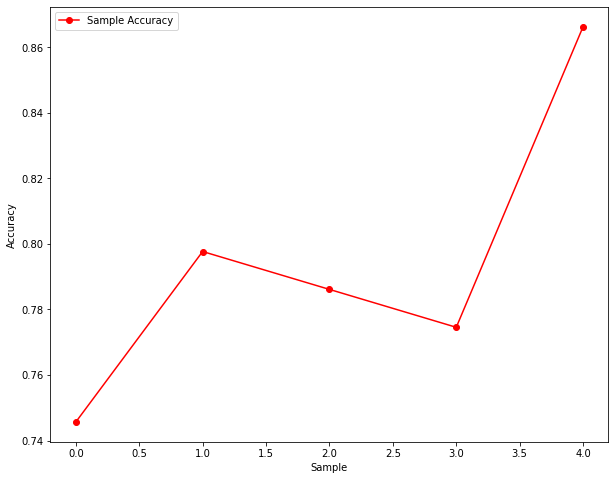

In [ ]:
plt.plot(range(0,5),MNB_acc,'ro-')
plt.legend(['Sample Accuracy'])
plt.xlabel('Sample')
plt.ylabel('Accuracy')
plt.show()

### Evaluation
In Naive Bayes classification, we assume the events to be independent and thus we write the probabilities of all the attributtes as a multiplication of them individually. Since we have 62 probabilities including probability of class in our preprocessed dataset, we will use that as our parameter for model complexity while finding the pessimistic error.

In [ ]:
evaluate(mean(MNB_acc),mean(length),mean(MNB_trainACC),int(mean(trainEX)),3,62,"NB")

Overall Accuracy: 0.79
True Error with 90 percent confidence is: 0.16 to 0.26
True Error with 80 percent confidence is: 0.17 to 0.25
Pessimistic Error is: 0.22


## Ripper
 solved using Weka here we are uploading the generated report

 Ripper with 5X5 Cross validation solved using weka


Run information

Scheme:       weka.classifiers.rules.JRip -F 3 -N 2.0 -O 2 -S 1
Relation:     db
Instances:    864
Attributes:   5
              Class
              L-Weight
              L-Distance
              R-Weight
              R-Distance
Test mode:    5-fold cross-validation

=== Classifier model (full training set) ===

### Rules
===========

(R-Weight <= 2) and (L-Distance >= 3) and (L-Weight >= 3) => Class=L (90.0/1.0)<br>
(R-Distance <= 2) and (L-Weight >= 3) and (L-Distance >= 3) => Class=L (54.0/1.0)<br>
(R-Weight <= 3) and (R-Distance <= 1) and (L-Distance >= 2) and (L-Weight >= 2) => Class=L (21.0/0.0)<br>
(R-Weight <= 1) and (L-Weight >= 2) and (L-Distance >= 3) => Class=L (12.0/0.0)
<br>(R-Distance <= 3) and (L-Weight >= 4) and (R-Weight <= 3) and (L-Distance >= 2) => Class=L (18.0/1.0)<br>
(R-Distance <= 1) and (L-Distance >= 2) and (L-Weight >= 3) => Class=L (6.0/0.0)
<br>(L-Weight >= 4) and (R-Weight <= 3) and (L-Distance >= 4) => Class=L (8.0/0.0)
<br>(R-Distance <= 3) and (L-Distance >= 4) and (L-Weight >= 4) => Class=L (8.0/0.0)
<br>(L-Weight >= 4) and (R-Distance <= 3) and (R-Weight <= 1) => Class=L (6.0/0.0)
<br>(R-Distance <= 1) and (L-Weight >= 2) and (L-Distance >= 3) => Class=L (6.0/0.0)
<br>(R-Weight <= 1) and (R-Distance <= 2) and (L-Distance >= 3) => Class=L (6.0/0.0)
<br>(R-Weight <= 1) and (L-Distance >= 2) and (L-Weight >= 3) => Class=L (8.0/0.0)
<br>(R-Distance <= 1) and (R-Weight <= 3) and (L-Weight >= 4) => Class=L (4.0/0.0)
<br>(R-Weight <= 3) and (R-Distance <= 1) and (L-Distance >= 4) => Class=L (4.0/0.0)
<br>(L-Distance >= 5) and (R-Weight <= 4) and (R-Distance <= 4) and (L-Weight >= 2) => Class=L (15.0/4.0)
<br>(R-Weight <= 2) and (R-Distance <= 2) and (L-Weight >= 3) and (L-Weight <= 3) => Class=L (5.0/1.0)
<br>(R-Distance >= 3) and (L-Weight <= 2) and (R-Weight >= 3) => Class=R (86.0/0.0)
<br>(L-Distance <= 3) and (R-Weight >= 4) and (R-Distance >= 4) => Class=R (36.0/0.0)
<br>(R-Distance >= 3) and (R-Weight >= 2) and (L-Distance <= 1) => Class=R (30.0/0.0)
<br>(R-Weight >= 3) and (R-Distance >= 2) and (L-Distance <= 1) => Class=R (15.0/0.0)
<br>(L-Weight <= 1) and (L-Distance <= 3) and (R-Weight >= 2) and (R-Distance >= 2) => Class=R (15.0/0.0)
<br>(R-Weight >= 5) and (L-Weight <= 4) and (L-Distance <= 4) => Class=R (23.0/0.0)
<br>(L-Weight <= 3) and (R-Distance >= 4) and (L-Distance <= 3) and (R-Weight >= 2) => Class=R (10.0/0.0)
<br>(L-Weight <= 3) and (R-Weight >= 4) and (L-Weight >= 3) and (R-Distance >= 4) => Class=R (5.0/0.0)
<br>(L-Weight <= 1) and (R-Weight >= 2) and (R-Distance >= 3) => Class=R (6.0/0.0)
<br>(L-Distance <= 2) and (L-Weight <= 1) and (R-Distance >= 3) => Class=R (6.0/0.0)
<br>(L-Weight <= 1) and (R-Weight >= 3) and (R-Distance >= 2) => Class=R (5.0/0.0)
<br>(R-Weight >= 3) and (L-Weight <= 2) and (L-Distance <= 1) => Class=R (4.0/0.0)
<br>(L-Distance <= 2) and (R-Distance >= 3) and (R-Weight >= 3) => Class=R (9.0/0.0)
<br>(R-Distance >= 5) and (L-Distance <= 4) and (L-Weight <= 4) => Class=R (11.0/0.0)
<br>(L-Distance <= 3) and (L-Weight <= 3) and (R-Weight >= 4) and (R-Distance >= 2) => Class=R (4.0/0.0)
<br>(L-Distance <= 1) and (L-Weight <= 2) and (R-Distance >= 3) => Class=R (2.0/0.0)
 => Class=B (326.0/38.0)

Number of Rules : 33


Time taken to build model: 0.22 seconds

=== Stratified cross-validation ===
=== Summary ===

Correctly Classified Instances         711               82.2917 %<br>
Incorrectly Classified Instances       153               17.7083 %<br>

=== Detailed Accuracy By Class ===

                   Precision  Recall   F-Measure    Class
                     0.722      0.858    0.784           B
                     0.875      0.826    0.850           R
                     0.904      0.785    0.840           L
                     0.834      0.823    0.825      weightage avg     



### Evaluation
Since the complexity of our Rule based classifier depends on the number of rules that the model will have to check while finding the class label for the test data, we will use the number of rules generated by our ruleset as our parameter for finding the pessimistic error.

In [ ]:
evaluate(0.822917,711,0.822917,711,3,33,"RIP")

Overall Accuracy: 0.82
True Error with 90 percent confidence is: 0.15 to 0.20
True Error with 80 percent confidence is: 0.16 to 0.20
Pessimistic Error is: 0.19


# Comparing Classifiers

***Accuracy may change each time the code is runned***<br>
Here is a comparison for how our various models compare, scored by accuracy:

| Model | Accuracy Score | True error (80%) | True error (90%) |
|----------------------|:------:|:-------:|:-------:|
| Decision Tree        | 83.0 |  0.14 - 0.21  | 0.13 - 0.22 |
| Rule Based (RIPPER)  | 82.0 |  0.16 - 0.20  | 0.15 - 0.20 |
| 5 Nearest Neighbour  | 81.0 |  0.15 - 0.22  | 0.14 - 0.23 |
| Naive Bayes          | 79.0 |  0.17 - 0.25  | 0.16 - 0.26 |

We can see that except Naive Bayes, all the other models give almost similar accuracy score. So, no definite comparision can be made about them. Decision tree gives highest score of 83 among all

All these accuracy values are acceptable and thus the models perform well.
We can still make a relative comparision on these models based on their accuracy score as: **Decision Tree > Rule Based (RIPPER) > 5 Nearest Neighbour > Naive Bayes**. 

Based on their true error scores, we can say that Ripper has the least true error for both the considered intervals and its accuracy is also comparable to as of ID3 accuracy so we can select ripper among all the classifier but judging just on the based of accuracy is not sufficiant 